<a href="https://colab.research.google.com/github/rebeccalizaverghese/IBM-Data-Science/blob/main/7.5_Data_Analysis_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Model Evaluation and Refinement**
Model Evaluation tells us how our model performs in the real world.

In [42]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [43]:
filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv'
df = pd.read_csv(filepath, header=0)
df.head()

,Unnamed: 0.1,Unnamed: 0,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,0,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,1,1,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,3,2,164,audi,std,four,sedan,fwd,front,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,4,4,2,164,audi,std,four,sedan,4wd,front,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [44]:
# to get only numeric data
df = df._get_numeric_data()
# To remove columns Unnamed:0.1 and Unnamed:0
df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace=True)
df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,1,122,94.5,0.822681,0.909722,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,2,164,99.8,0.848630,0.919444,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,2,164,99.4,0.848630,0.922222,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [45]:
# Plotting:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.kdeplot(RedFunction, color="r", label=RedName)
    ax2 = sns.kdeplot(BlueFunction, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')
    plt.show()
    plt.close()

In [46]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))


    #training data
    #testing data
    # lr:  linear regression object
    #poly_transform:  polynomial transformation object

    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

#### Training & Testing
Separating the data into training and testing sets is an important part of model evaluation. We use the test data to get an idea how our model will perform in the real world. When we split the data, usually the larger portion of data is used for training and a smaller part is used for testing.

In [47]:
# Training and Testing
y_data = df['price']
# x_data includes all data columns outside of price -> remove price
x_data = df.drop('price', axis=1)

In [48]:
# import train-test split from sklearn
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)
# test_size is the percentage/ proportion of data that is split into the testing set => 0.10 = 10%
print("Number of test samples:", x_test.shape[0])
print("Number of training samples: ", x_train.shape[0])

Number of test samples: 21
Number of training samples:  180


In [49]:
# Use the function "train_test_split" to split up the dataset such that 40% of the data samples will be utilized for testing. Set the parameter "random_state" equal to zero.
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0)
print("Number of test samples:", x_test1.shape[0])
print("Number of training samples: ", x_train1.shape[0])

Number of test samples: 81
Number of training samples:  120


In [50]:
# import linear regression
from sklearn.linear_model import LinearRegression
# Create LinearRegression object
lm = LinearRegression()
# We fit the model using the feature "horsepower
lm.fit(x_train[['horsepower']], y_train)

LinearRegression()

In [51]:
# Calculate R^2 on the test data
lm.score(x_test[['horsepower']], y_test)

0.36358755750788263

In [52]:
# Calculate R^2 on train data
lm.score(x_train[['horsepower']], y_train)
#We can see the R^2 is much smaller using the test data compared to the training data.

0.6619724197515104

In [53]:
lm.fit(x_train1[['horsepower']], y_train1)
print("R^2 for training set =", lm.score(x_train1[['horsepower']], y_train1))
print("R^2 for testing set =", lm.score(x_test1[['horsepower']], y_test1))

R^2 for training set = 0.5754067463583004
R^2 for testing set = 0.7139364665406973


#### Cross Validation Score
One of the most common out-of-sample evaluation metrics is cross validation. In this method, the dataset is split into k equal groups, where each group is referred to as a fold. Some of the folds can be used as a training set to train the model, and the remaining parts are used as a test set which we use to test the model. The process is repeated until each partition/ fold is used for both training and testing. And at the end, we use the average result as the estimate of out-of-sample error. The evaluation metric depends on the model

In [54]:
# import cross_val_score from sklearn model selection
from sklearn.model_selection import cross_val_score
# We input the object, the feature ("horsepower"), and the target data (y_data). The parameter 'cv' determines the number of folds. In this case, it is 4.
rcross = cross_val_score(lm, x_data[['horsepower']], y_data, cv=4)
rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [55]:
# We can estimate the average and standard deviation of our estimate
mean = rcross.mean()
std = rcross.std()
print("The mean/ average of the folds are ", mean)
print("The standard deviation of the folds are ", std)

The mean/ average of the folds are  0.522009915042119
The standard deviation of the folds are  0.291183944475603


In [56]:
cross = cross_val_score(lm, x_data[['horsepower']], y_data, cv=2)
print(cross)
print("The average R^2 of the folds are ", cross.mean())

[0.59015621 0.44319613]
The average R^2 of the folds are  0.5166761697127429


You can also use the function 'cross_val_predict' to predict the output. The function splits up the data into the specified number of folds, with one fold for testing and the other folds are used for training.

In [57]:
from sklearn.model_selection import cross_val_predict
yhat = cross_val_predict(lm, x_data[['horsepower']], y_data, cv=4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

#### Overfitting, Underfitting and Model Selection
**Model Selection**: The goal of model selection is to determine the order of the polynomial to provide the best estimate of the function y(x)

**Overfitting**: Overfitting occurs when the model is too flexible and fits the noise, but not the underlying process. Therefore, when testing your model using the test set, your model does not perform as well since it is modelling noise, not the underlying process that generated the relationship

In [78]:
# Create a Multiple Linear Regression object
lm = LinearRegression()
lm.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)
# prediction using training data
yhat_train = lm.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([10339.72153842, 16985.8799431 ,  5598.3465799 , 17847.41951585,
        8341.37366333])

In [79]:
yhat_test = lm.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([ 5161.5792971 , 10932.80542628, 20947.94811305, 21106.87609867,
       20042.9233316 ])

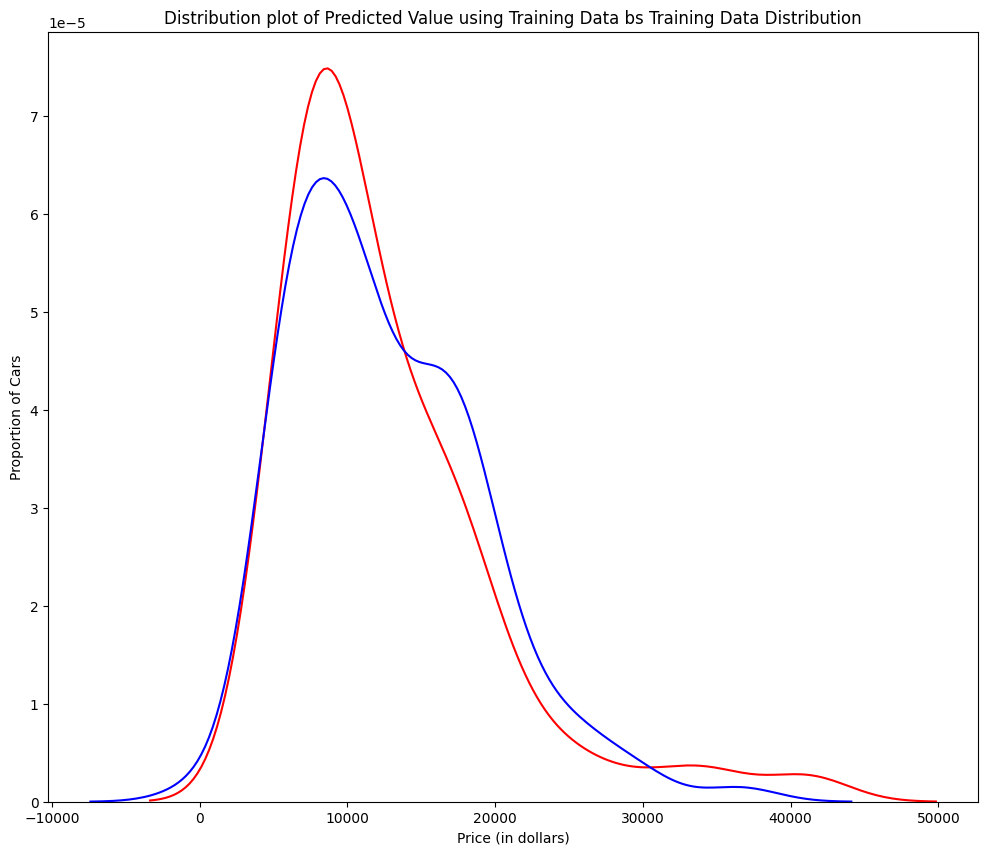

In [80]:
# Distribution Plot of predicted values of training data
Title = "Distribution plot of Predicted Value using Training Data bs Training Data Distribution"
DistributionPlot(y_train, yhat_train, "Actual Values (train)", "Predicted Values (train)", Title)

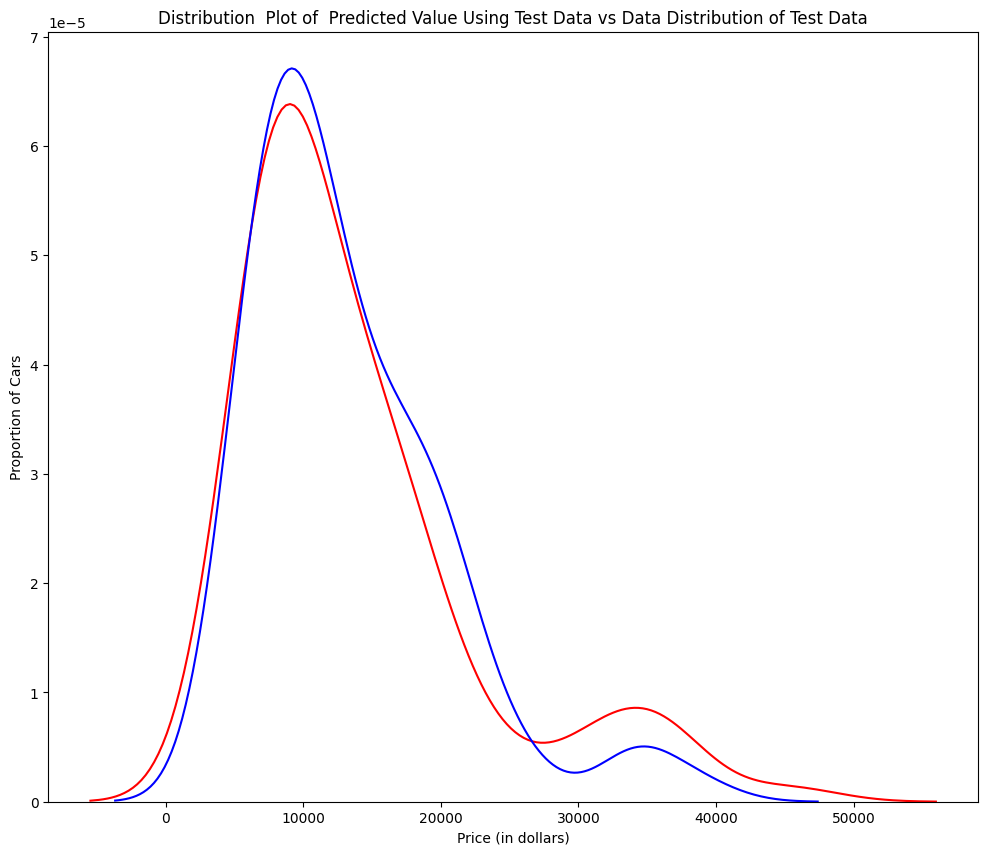

In [81]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

Interpretation: Comparing Figure 1 and Figure 2, it is evident that the distribution of the test data in Figure 1 is much better at fitting the data. This difference in Figure 2 is apparent in the range of 5000 to 15,000. This is where the shape of the distribution is extremely different.

In [82]:
from sklearn.preprocessing import PolynomialFeatures

In [93]:
# 55/45 train/test split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)
# Degree 5 polynomial transformation on feature 'horsepower'
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

In [84]:
# create a Linear Regression model "poly" and train it
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

In [85]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 6728.65561887,  7307.98782321, 12213.78770965, 18893.24804015,
       19995.95195136])

In [86]:
print("Predicted values: ", yhat[0:4])
print("Target values: ", y_test[0:4].values)

Predicted values:  [ 6728.65561887  7307.98782321 12213.78770965 18893.24804015]
Target values:  [ 6295. 10698. 13860. 13499.]


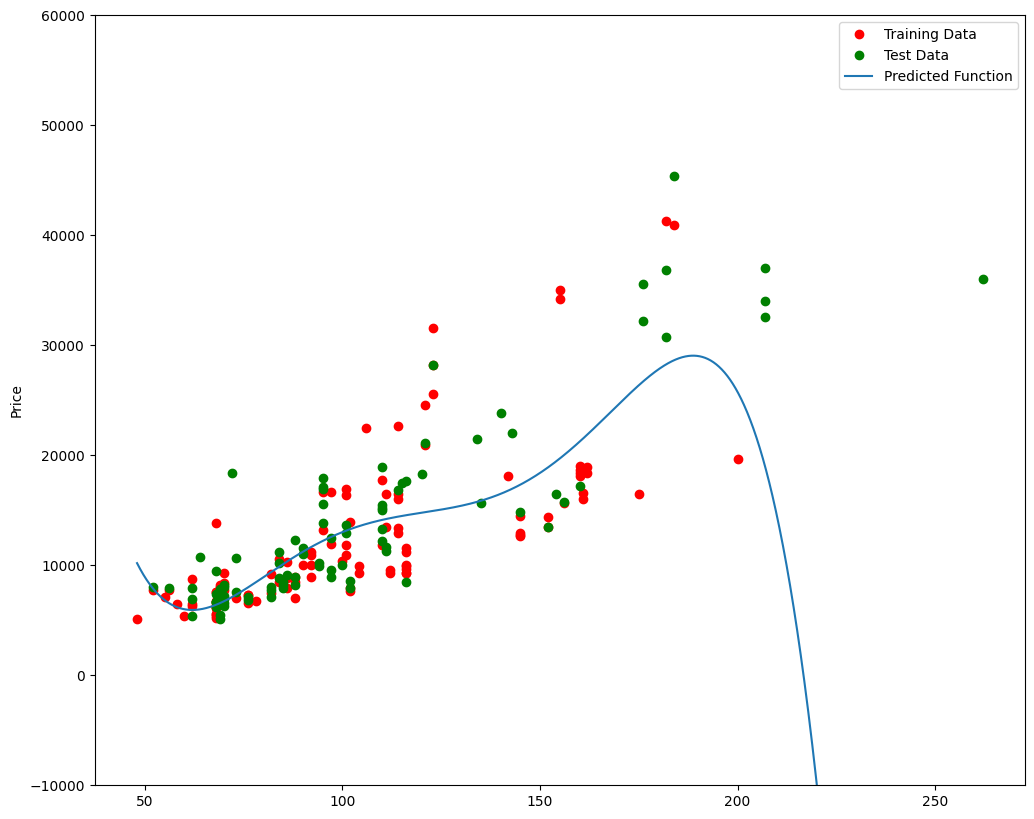

In [87]:
# display the training data, testing data, and the predicted function
PollyPlot(x_train['horsepower'], x_test['horsepower'], y_train, y_test, poly, pr)

Interpretation: A polynomial regression model where red dots represent training data, green dots represent test data, and the blue line represents the model prediction.

We see that the estimated function appears to track the data but around 200 horsepower, the function begins to diverge from the data points.

In [88]:
# R^2 of training data
print("R^2 of training data= ", poly.score(x_train_pr, y_train))
# R^2 of test data
print("R^2 of testing data= ", poly.score(x_test_pr, y_test))

R^2 of training data=  0.5567716902120254
R^2 of testing data=  -29.871340302043684


Interpretation: We see the R^2 for the training data is 0.5567 while the R^2 on the test data was -29.87. The lower the R^2, the worse the model. A negative R^2 is a sign of overfitting.

Text(3, 0.75, 'Maximum R^2 ')

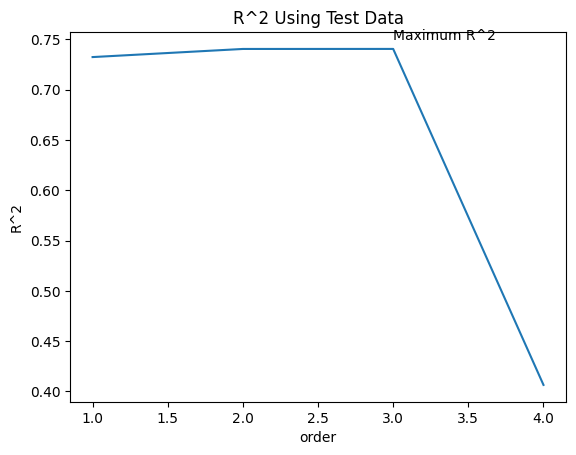

In [99]:
# To see how the R^@ changes on the test data for different order polynomials
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    lr.fit(x_train_pr, y_train)
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')

Interpretation: We see the R^2 gradually increases until an order three polynomial is used. Then, the R^2 dramatically decreases at an order four polynomial.

In [102]:
pr1 = PolynomialFeatures(degree=2)
x_train_pr1 = pr1.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
x_test_pr1 = pr1.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
print("Dimensions of new training feature", x_train_pr1.shape, "& testing feature", x_test_pr1.shape)

Dimensions of new training feature (110, 15) & testing feature (91, 15)


In [103]:
poly1 = LinearRegression()
poly1.fit(x_train_pr1, y_train)

LinearRegression()

In [105]:
test1 = poly1.predict(x_test_pr1)
test1[0:3]

array([ 6303.02917845, 10402.87148089, 20516.37185567])

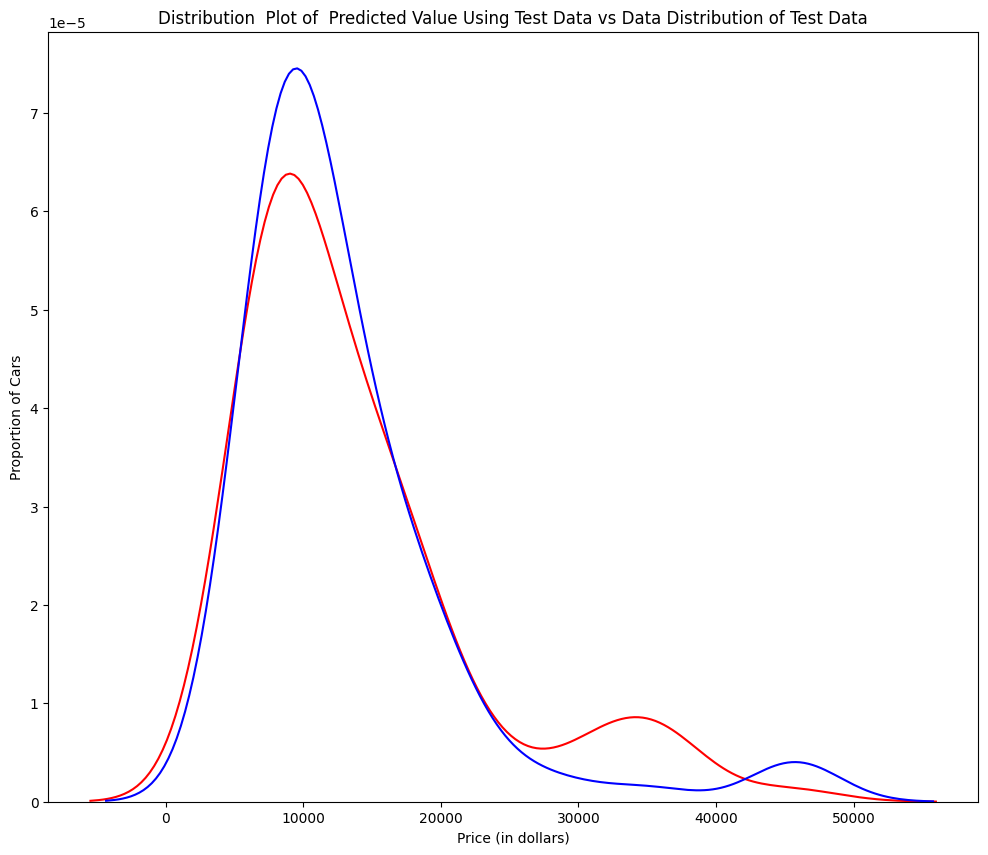

In [107]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test, test1, "Actual Values (Test)", "Predicted Values (Test)", Title)

Interpretation: The predicted value is higher than actual value for cars where the price 10,000 range, conversely the predicted price is lower than the price cost in the 30,000 to 40,000 range. As such the model is not as accurate in these ranges.

#### Ridge Regression
Ridge regression is the process of regularizing the feature set using the hyperparameter alpha. Tt can be utilized to regularize and reduce standard errors and avoid over-fitting while using a regression model. It prevents overfitting which can be a big problem when we have multiple independent variables/ features.

Ridge regression controls the magnitude of these polynomial coefficients by introducing the parameter Alpha.
Alpha is a parameter we select before fitting or training the model.

Different values of Alpha can change the model.
- As Alpha increases, the parameters get smaller
- If Alpha is too large, the coefficients will approach 0 and underfit the data
- If Alpha is 0, the overfitting is evident
- For Alpha=0.001, the overfitting begins to subside
- For Alpha=0.01, the estimated function tracks the actual function.
- When Alpha=1, we see the first signs of underfitting – the estimated function does not have enough flexibility
- At Alpha=10, we see extreme underfitting



In [130]:
pr2=PolynomialFeatures(degree=2)
x_train_pr2 = pr2.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr2 = pr2.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

In [131]:
# import ridge from linear model
from sklearn.linear_model import Ridge
# Create a Ridge object and set the regulization parameter (alpha) = 0.1
ridgemodel = Ridge(alpha=1)
# Fit the model
ridgemodel.fit(x_train_pr2, y_train)

Ridge(alpha=1)

In [132]:
# prediction
pred = ridgemodel.predict(x_test_pr2)
print('predicted:', pred[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 6570.82441941  9636.24891471 20949.92322737 19403.60313256]
test set : [ 6295. 10698. 13860. 13499.]


In [133]:
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    ridgemodel = Ridge(alpha=alpha)
    ridgemodel.fit(x_train_pr2, y_train)
    test_score, train_score = ridgemodel.score(x_test_pr2, y_test), ridgemodel.score(x_train_pr2, y_train)

    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|██████████| 1000/1000 [00:07<00:00, 125.52it/s, Test Score=0.564, Train Score=0.859]


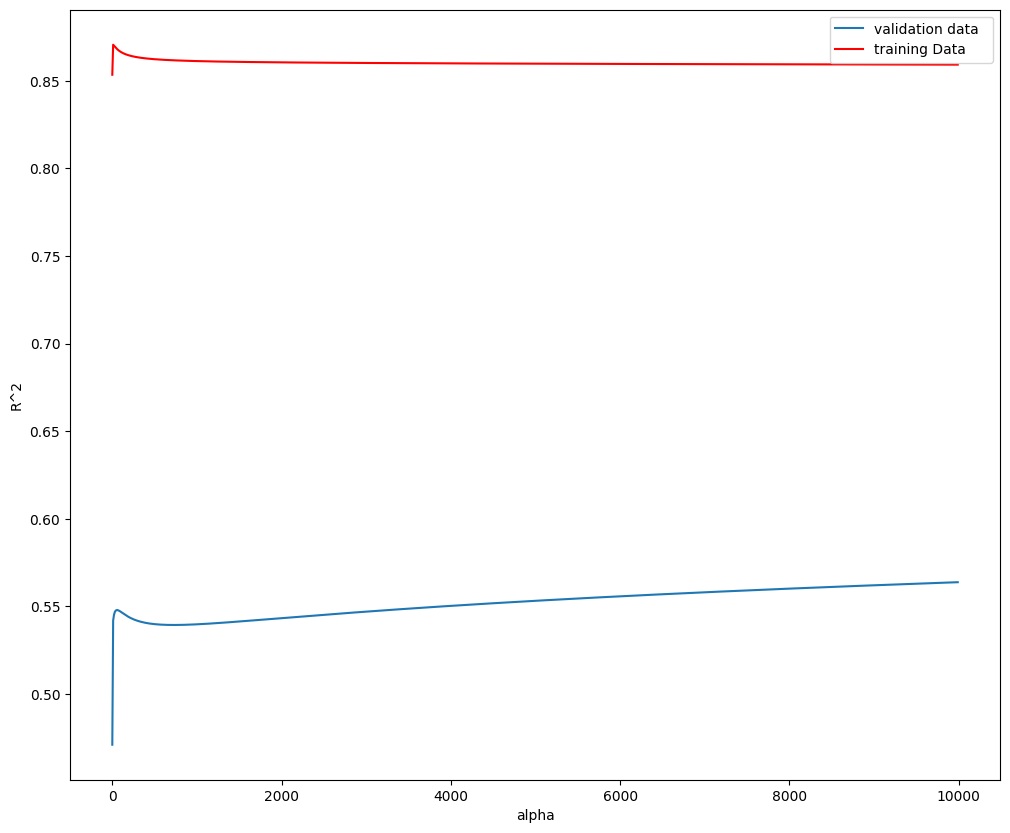

In [134]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

Interpretation: The blue line represents the R^2 of the validation data, and the red line represents the R^2 of the training data. The x-axis represents the different values of Alpha.

The red line in Figure 4 represents the R^2 of the training data. As alpha increases the R^2 decreases. Therefore, as alpha increases, the model performs worse on the training data

The blue line represents the R^2 on the validation data. As the value for alpha increases, the R^2 increases and converges at a point.


#### Grid Search
It allows us to scan through multiple free parameters with few lines of code.Parameters like the alpha term are not part of the fitting or training process. These values are called hyperparameters.



In [135]:
from sklearn.model_selection import GridSearchCV
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1
RR=Ridge()
RR
Grid1 = GridSearchCV(RR, parameters1,cv=4)
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)


GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

In [136]:
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

In [137]:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8411649831036151

### **Exercise**

In [138]:
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures

In [142]:
csv = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv'
DF = pd.read_csv(csv, header=0)
DF = DF._get_numeric_data()
DF.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace=True)
DF.head()

,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Screen-Full_HD,Screen-IPS_panel
0,4,2,1,5,14.0,0.551724,8,256,3.52800,978,0,1
1,3,1,1,3,15.6,0.689655,4,256,4.85100,634,1,0
2,3,1,1,7,15.6,0.931034,8,256,4.85100,946,1,0
3,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,0,1
4,4,2,1,7,15.6,0.620690,8,256,4.21155,837,1,0


In [143]:
# TASK 1
# Using Cross Validation to improve model
#Divide the dataset into x_data and y_data parameters. Here y_data is the "Price" attribute, and x_data has all other attributes in the data set.
X_data = DF.drop('Price', axis=1)
Y_data = DF['Price']

In [146]:
# Split the data set into training and testing subests such that you reserve 10% of the data set for testing purposes
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.1, random_state=1)
print("Number of test samples: ", X_test.shape[0])
print("Number of train samples: ", X_train.shape[0])

Number of test samples:  24
Number of train samples:  214


In [147]:
LR = LinearRegression()
LR.fit(X_train[['CPU_frequency']], Y_train)
print("R^2 of test sample:", LR.score(X_test[['CPU_frequency']], Y_test))
print("R^2 of train samples: ", LR.score(X_train[['CPU_frequency']], Y_train))

R^2 of test sample: -0.06599437350393789
R^2 of train samples:  0.14829792099817973


In [148]:
crossval = cross_val_score(LR, X_data[['CPU_frequency']], Y_data, cv=4)
print("Average of folds = ", crossval.mean())
print("Standard Deviation of folds = ", crossval.std())

Average of folds =  -0.16109232388595113
Standard Deviation of folds =  0.384957978666471


In [158]:
# TASK 2
# Overfitting
# Split the data set into training and testing components again, this time reserving 50% of the data set for testing.
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.5, random_state=0)


In [161]:
#  Create polynomial features using the single attribute.
LRE = LinearRegression()
RSQU_test = []
order = [1,2,3,4,5]
for n in order:
  PF = PolynomialFeatures(degree=n)
  X_train_PF = PF.fit_transform(X_train[['CPU_frequency']])
  X_test_PF = PF.fit_transform(X_test[['CPU_frequency']])
  LRE.fit(X_train_PF, Y_train)
  RSQU_test.append(LRE.score(X_test_PF, Y_test))

Text(0.5, 1.0, 'R^2 using Test Data')

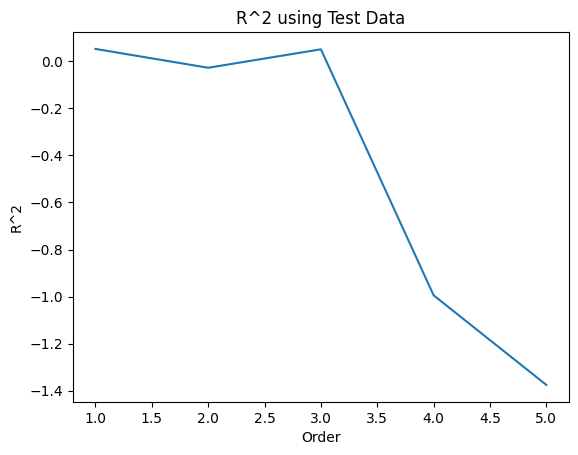

In [162]:
# Plot values of R^2 scores against order
plt.plot(order, RSQU_test)
plt.xlabel('Order')
plt.ylabel('R^2')
plt.title('R^2 using Test Data')

In [163]:
# TASK 3
# Ridge Regression
# Create a polynomial feature model that uses all these parameters with degree=2
pf = PolynomialFeatures(degree=2)
X_train_pf = pf.fit_transform(X_train[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core','OS','GPU', 'Category']])
X_test_pf = pf.fit_transform(X_test[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core','OS','GPU', 'Category']])

In [164]:
# Create a Ridge Regression model and evaluate it using values of the hyperparameter alpha ranging from 0.001 to 1 with increments of 0.001. Create a list of all Ridge Regression R^2 scores for training and testing data.
rsqu_test = []
rsqu_train = []
Alpha = np.arange(0.001,1,0.001)
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha)
    RigeModel.fit(X_train_pf, Y_train)
    test_score, train_score = RigeModel.score(X_test_pf, Y_test), RigeModel.score(X_train_pf, Y_train)
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})
    rsqu_test.append(test_score)
    rsqu_train.append(train_score)

100%|██████████| 999/999 [00:07<00:00, 125.52it/s, Test Score=0.423, Train Score=0.669]


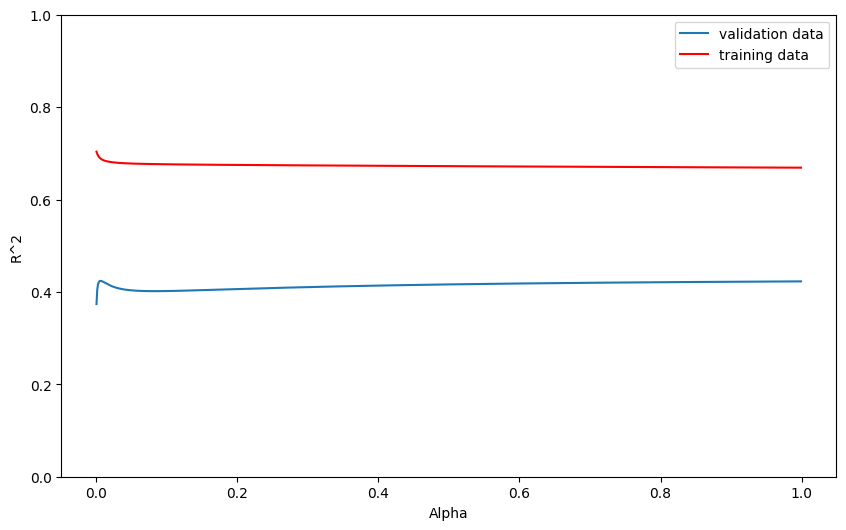

In [165]:
plt.figure(figsize=(10,6))
plt.plot(Alpha, rsqu_test, label='validation data')
plt.plot(Alpha, rsqu_train, 'r', label='training data')
plt.xlabel('Alpha')
plt.ylabel('R^2')
plt.ylim(0,1)
plt.legend()

In [166]:
# TASK 4
# Grid Search
# Using the raw data and the same set of features as used above, use GridSearchCV to identify the value of alpha for which the model performs best
parameters = [{'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 10]}]
# Create a Ridge instance and run Grid Search using a 4 fold cross validation.
rr = Ridge()
grid = GridSearchCV(rr, parameters, cv=4)
# Fit the Grid Search to the training data.
grid.fit(X_train[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']], Y_train)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]}])

In [169]:
# Print the R^2 score for the test data using the estimator that uses the derived optimum value of alpha.
bestrr=grid.best_estimator_
bestrr

Ridge(alpha=10)

In [170]:
best_score = bestrr.score(X_test[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core','OS','GPU','Category']], Y_test)
print("R^2 score for test data = ", best_score)

R^2 score for test data =  0.300990504869182
